# 6 Solutions 

In this workshop, we will consolidate our understanding of maximum likelihood estimation in the case where you have $n$ i.i.d. observations.  

## Question 1: Poisson distribution 
In this question, we will derive the MLE for $\lambda$ for the Poisson distribution where were have $n$ i.i.d. observations. Recall from the Practical in Session 5 that a store manager wishes to estimate the number of customers to expect during lunch hour. The Poisson distribution is often used to model discrete counts (numbers of people in the queue), and has the parameter  𝜆 . Suppose they collect data from 10 random days between 12pm and 1pm, and they get the following numbers of customers: 26, 23, 29, 27, 20, 19, 24, 24, 25, 21.

a) Find the likelihood function for $\lambda$, given that we have $n$ i.i.d. observations. 

*Since the overall likelihood from independent observations is the product of the likelihood from each observation, we have that*: 

$$
\mathcal{L} \left( \lambda \mid x_1, x_2, ..., x_n \right) = \prod_{i=1}^n\frac{e^{-\lambda} \lambda^{x_i}}{x_i!}.
$$

b) Now find the log-likelihood for $\lambda$, given that we have $n$ i.i.d. observations. 

*The log-likelihood is* 

$$
\begin{align}
l \left( \lambda \mid x_1, x_2, ..., x_n  \right) &= \sum_{i=1}^n \log \left( \frac{e^{-\lambda} \lambda^{x_i}}{x_i!} \right)\\
                                                  &= \sum_{i=1}^n  \left(-\lambda + x_i \log \lambda - \log(x_i!) \right)\\
                                                  &=-n\lambda + \log\lambda \sum_{i=1}^n x_i -\sum_{i=1}^n \log(x_i!) \\
\end{align}
$$

c) In the lectures, we went over the three steps for obtaining the MLE. Use this procedure to find the MLE for $\lambda$ when you have $n$ i.i.d. observations. Find the maximum likelihood estimate for our example with ten customers.

*Follow the three steps*:    

**Step1:** Taking the derivative with respect to $\lambda$:

$$
\begin{equation}
\frac{d l\left( \lambda \mid x_1 ,..., x_n \right) }{d \lambda}= -n + \frac{\sum_{i=1}^n x_i }{\lambda}
\end{equation}
$$

**Step2:** Setting the derivative equal to zero and solving for $\lambda$:

$$
\begin{equation}
0= -n + \frac{\sum_{i=1}^n x_i }{\lambda}
\end{equation}
$$

$$
\begin{equation}
\hat{\lambda}= \frac{\sum_{i=1}^n x_i }{n} = \bar{x}
\end{equation}
$$

**Step3:** Verify you have a maximum:     
This is a maximum, since the second derivative of the log-likelihood is $-\frac{\sum_{i=1}^n x_i }{\lambda^2}$ which is negative since $x_i$ and $\lambda$ are positive.


*Find the MLE for our example*:   

In [2]:
##Compute the MLE 

data <- c(26, 23, 29, 27, 20, 19, 24, 24, 25, 21)
mean(data)

[1] 23.8

We have that $\hat{\lambda}=23.8$.

d) OPTIONAL: Plot the log-likelihood function given the data, allowing $\lambda$ to take values between 0 and 40. Verify that that answer you found for the the MLE is indeed the maximum of the graph. 

[1] "Maximal value found when lambda is 23.8"


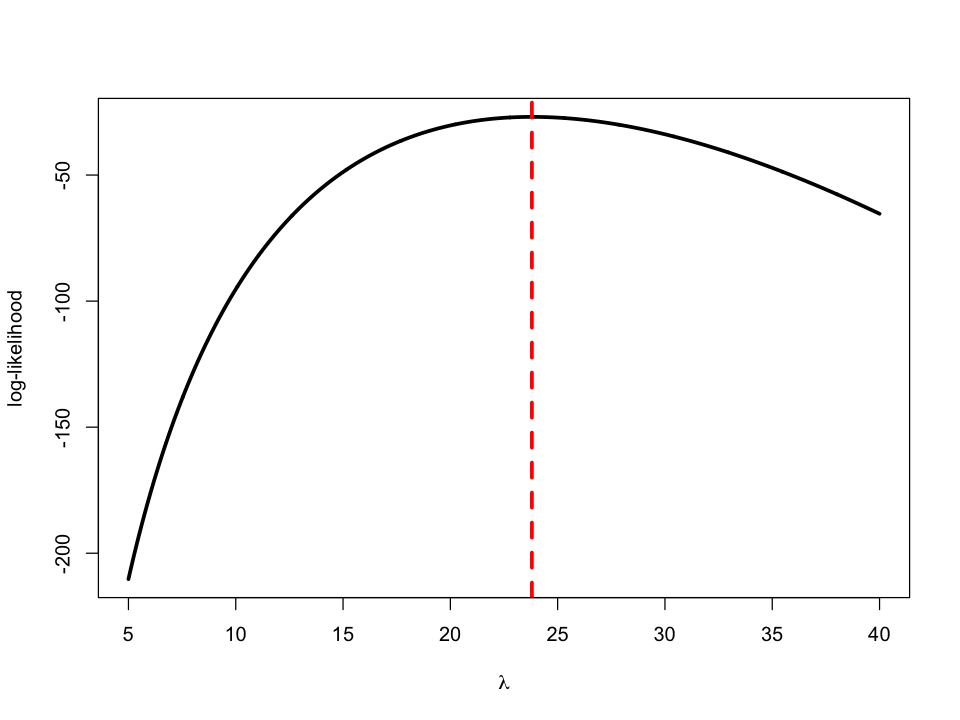

In [13]:
options(repr.plot.width=8, repr.plot.height=6)

data <- c(26, 23, 29, 27, 20, 19, 24, 24, 25, 21)

#possible values for lambda
lambda <- seq(5, 40, 0.02)

sum_data<- sum(data)
sumlogfac_data <- sum(log(factorial(data)))
n <- 10
# find the log-likelihood for each value of lambda
ll <- -n*lambda +log(lambda)*sum_data-sumlogfac_data

plot(lambda, ll, type="l",lwd=3, 
     xlab=expression(lambda), ylab="log-likelihood")
oo <- which(ll == max(ll))
print(paste0("Maximal value found when lambda is ",lambda[oo]))
abline(v=lambda[oo],col="red",lwd=3,lty=2)

## Question 2: Normal distribution

In the lectures, we found the MLE for $\mu$ when you have a normally distributed i.i.d. sample of size $n$. Now find the MLE of $\sigma^2$. Note that you are treating $\sigma^2$ as a variable in its own right; you may find it helpful to write $u = \sigma^2$ and differentiate with respect to $u$.

Recall that we obtained the log-likelihood in the lectures: 

$$
\begin{align}  
l \left(\mu, \sigma^2 \mid  \boldsymbol{x}  \right)
&=  {-\frac{n}{2}}\log (2 \pi \sigma^2) -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2
\end{align}
$$


**Step1**: Take the derivative of the log-likelihood with respect to  $\sigma^2$. This requires use of the chain rule:

$$
\begin{align}  
\frac{d l \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d \sigma^2}
&=  -\frac{n}{2 \sigma^2} + \frac{\sum_{i=1}^n (x_i-\mu) ^2 }{2 (\sigma^2)^2}
\end{align}
$$

**Step2:** Setting the derivative equal to zero and solving for $\sigma^2$:

$$
\begin{align}  
0 &=  -\frac{n}{2 \sigma^2} + \frac{\sum_{i=1}^n (x_i-\mu) ^2 }{2 (\sigma^2)^2}
\end{align}
$$

$$
\begin{align}  
\frac{n}{ \sigma^2}  &= \frac{\sum_{i=1}^n (x_i-\mu) ^2 }{ (\sigma^2)^2}
\end{align}
$$

$$
\begin{align}  
n\sigma^2  &=\sum_{i=1}^n (x_i-\mu) ^2 
\end{align}
$$

$$
\begin{align}  
\sigma^2  &=\frac{\sum_{i=1}^n (x_i-\mu) ^2 }{n}
\end{align}
$$

We have that the MLE for $\sigma^2$ is the variance, $\frac{\sum_{i=1}^n (x_i-\mu) ^2 }{n}$. 

**Step3:** Find the second derivative: 

$$
\begin{align}  
\frac{d l^2 \left(\mu, \sigma^2 \mid  \mathbf{x}  \right) }{d (\sigma^2 )^2}
&=  \frac{n}{2 (\sigma^2)^2} -2 \frac{\sum_{i=1}^n (x_i-\mu) ^2 }{2 (\sigma^2)^3} \\
&= \frac{ n\sigma^2-2\sum_{i=1}^n (x_i-\mu) ^2 }{2(\sigma^2)^3}
\end{align} 
$$

Note that the denominator is positive. So we just need to show that the numerator is negative. If we plug in our MLE for $\sigma^2$, the numerator becomes; 

$$
\begin{align}
&\frac{n\sum_{i=1}^n (x_i-\mu) ^2 }{n}-2\sum_{i=1}^n (x_i-\mu) ^2  \\
&=-\sum_{i=1}^n (x_i-\mu) ^2,
\end{align}
$$

which is negative, so we have verified that the MLE of $\sigma^2 =\frac{\sum_{i=1}^n (x_i-\mu) ^2 }{n}$. Now, this estimator is actually biased (particularly for small samples), so typically, the sample variance, $\frac{\sum_{i=1}^n (x_i-\mu) ^2 }{n-1}$, is used since it is unbiased. This will be discussed in more detail in the Linear Regression section. 


## Question 3: Properties of the MLE 

In the lectures, we used a simulation to demonstrate some important asymptotic properties of the maximum likelihood estimator. We generated a sample of size 8 from the exponential distribution where $\lambda=0.0818$. We then calculated the MLE $\frac{1}{\bar{x}}$, repeated this 100 times and plotted a histogram of the MLEs. This is the sampling distribution of the MLE. We then changed the sample size, $n$, to larger numbers and observed the behavior of the histogram.   

Let us denote by $M$ the median of the observations. Can you change the code below to investigate how the distribution of $\frac{1}{M}$ changes as $n$ becomes larger? What do you notice? 

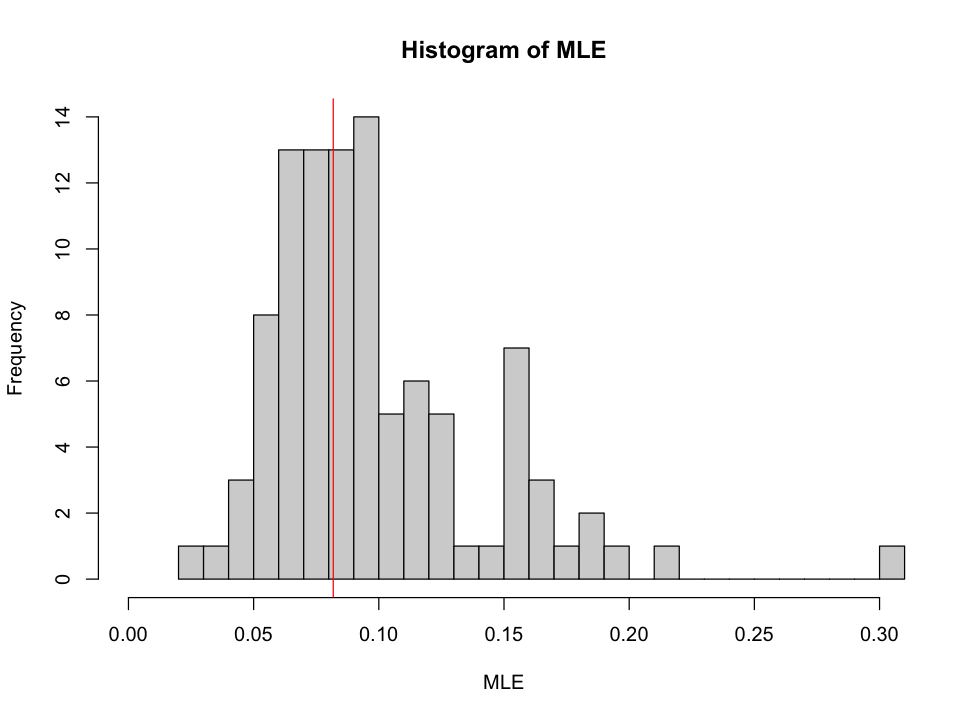

In [14]:
n <- 8 #  make this sample size bigger, and see what happens to the histogram! 

#MLEs will be stored in this vector
mle <- rep(0, 100)

for (i in 1:100){
  #generate a sample of size n from an exponential distribution with lambda=0.0818
  sample <- rexp(n, rate=0.0818)
  #calculate the MLE (the reciprocal mean of the sample) and store it 
  mle[i] <- 1/mean(sample)    ##################just need to change this to 1/median(sample)
}

#plot a histogram of the 100 MLEs 
hist(mle, breaks=20, 
     xlim=c(0, 0.3), 
     main="Histogram of MLE", 
     xlab="MLE")
#add red line to indicate true lambda 
abline(v=0.0818, col="red")

Using the $\frac{1}{M}$ as an estimator, the estimates are much larger than the true value; this makes sense since the exponential distribution is skewed to the right. The estimator $\frac{1}{M}$ does not have the asymptotic properties that the the MLE for $\lambda$ has - e.g. you can see that it is biased.  

## Question 4: Gamma distribution (Optional)

This optional question will explore the gamma distribution. It is used to model real‐valued positive measurements, such as time waiting for a hospital bed, or time spent in a queue when you make a phone call to your electricity supplier. It is characterized by two parameters, the shape parameter $\alpha$ and scale parameter $\beta$ (though other parameterizations exist). Both $\alpha$ and $\beta$ are positive.     

Suppose that you make a phone call to your electricity supplier and you are put on hold in a queue. If we assume that the company picks up the calls in a way that is completely random (a Poisson process), the waiting time would have a gamma distribution with $\alpha$ equal to the number of customers in the queue and $\beta$ equal to the average wait time when you are at the front of the queue. The p.d.f. of the gamma distribution is given by:

$$
\begin{equation}
f \left( x \mid \alpha, \beta \right) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}, 
\end{equation}
$$

where $\Gamma \left( \cdot \right)$ is the gamma function. For positive integers $\alpha$, we have that $ \Gamma (\alpha )=(\alpha -1)!$.   

Suppose you observe that your wait time for this queue is 4 minutes. How would we try to obtain a maximum likelihood estimate for $\alpha$ and $\beta$?  

For now, let's assume that you did not know how many people were in the queue in front of you. The code below plots the surface of the likelihood for $1 \leq \alpha \leq 20$ and $1 \leq \beta \leq 10$. 

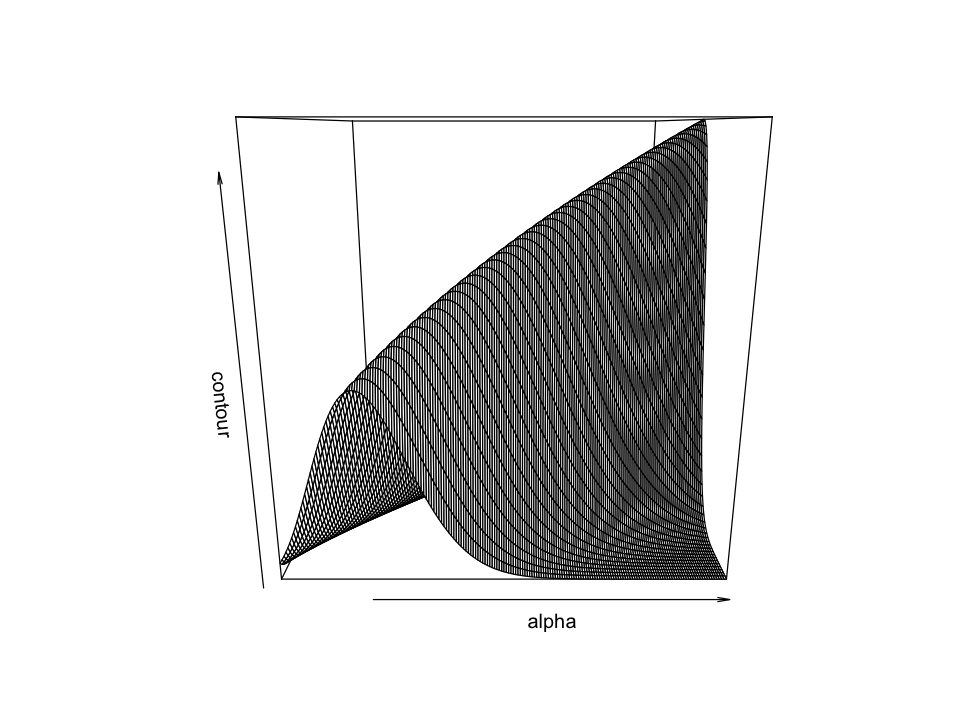

In [15]:
plotgamma <- function(a, b){
  dgamma(4, shape=a, rate=b) 
  
}

alpha <- seq(1, 20, 0.1)
beta <- seq(1, 10, 0.1)
contour <- outer(alpha, beta,  plotgamma)

persp(alpha, beta, contour)

# or if you prefer 2-D figures...
vals <- as.data.frame(expand.grid(alpha,beta))
vals$llike <- dgamma(4, shape=a, rate=b) 

As you can see, the maximum likelihood estimate of $\alpha$ depends on the value of $\beta$ and vice-versa. There is a dependence between the two parameters for the gamma distribution. 

If we know that $\alpha=12$, i.e. that there are 12 people in front of you in the queue, can you obtain the maximum likelihood estimate for $\beta$? You can take either a graphical approach or an algebraic approach. 

### Graphical approach: 
We plot the likelihood function of $\beta$, keeping $\alpha$ fixed at 12. 

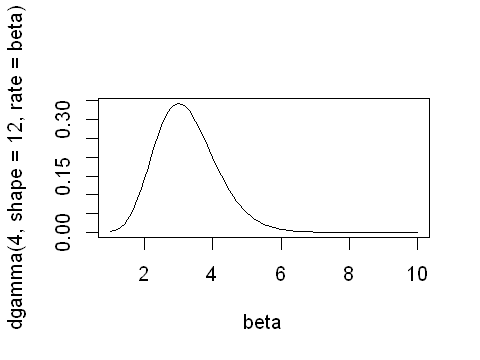

In [5]:
beta <- seq(1, 10, 0.1)
plot(beta, dgamma(4, shape=12, rate=beta), type="l")

As it is a little difficult to see where the maximum is, we reproduce the plot with $\beta$ taking values just between 2 and 4. 

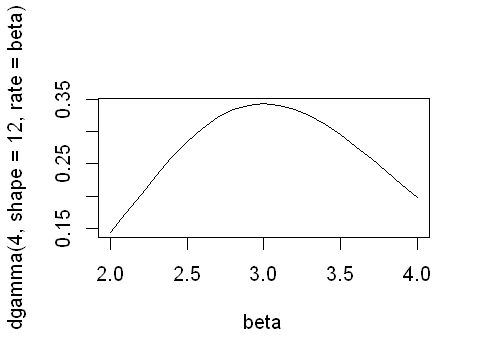

In [6]:
beta <- seq(2, 4, 0.1)
plot(beta, dgamma(4, shape=12, rate=beta), type="l")

We can see that the MLE is $\hat{\beta}=3$. 

### ALGEBRAIC APPROACH: 
We have that the likelihood function is:  

$$
\begin{equation}
\mathcal{L} \left( \beta \mid x, \alpha \right) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}
\end{equation}
$$

The log-likelihood is: 

$$
\begin{equation}
l \left( \beta \mid x, \alpha \right) = \alpha ln \beta - ln \Gamma(\alpha) + (\alpha-1)lnx-\beta x 
\end{equation}
$$

And now we differentiate this with respect to $\beta$:

$$
\begin{equation}
\frac{dl \left( \beta \mid x, \alpha \right)}{d\beta} = \frac{\alpha}{\beta} - x 
\end{equation}
$$

Setting the derivative equal to zero and solving for $\beta$, we have:

$$
\begin{equation}
0 = \frac{\alpha}{\beta} - x 
\end{equation}
$$

$$
\begin{equation}
\hat{\beta} = \frac{\alpha}{x}  
\end{equation}
$$

We have that the MLE is: $\hat{\beta} = \frac{\alpha}{x}$. This is a maximum since the second derivative of the log-likelihood is equal to $-\frac{\alpha}{\beta^2}$. If we plug $\frac{\alpha}{x}$ for $\beta$ in the second derivative, we get $\frac{-x^2}{\alpha}$ which is negative, as $\alpha$ is positive. 

In our example, we have that $\alpha$ is 12, and we observe a waiting time of 4 minutes. Our MLE is $\hat{\beta}=\frac{12}{4}=3$, which agrees with our answer using the graphical approach. 